# INSTALL LIBRALY

In [1]:
!pip install pythainlp
!pip install scikit-multilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 5.7 MB/s eta 0:00:00


# IMPORT LIBRALY

In [2]:
import pandas as pd
import numpy as np
# convert list
import ast
# date time
from datetime import datetime
#one hot encoder
from sklearn.preprocessing import MultiLabelBinarizer
# skip warning
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings( action= 'ignore')
# vitualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
# delete outlier
from sklearn.neighbors import LocalOutlierFactor
# clean thai words
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize
# regular expression
import re
import string

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

from sklearn.metrics import f1_score, make_scorer, hamming_loss, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn import model_selection

# model
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB

from sklearn import preprocessing
import scipy.sparse as sp

# IMPORT DATASET

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DATA PREPROCESSING

In [4]:
test_result = pd.read_csv("/content/drive/MyDrive/nlp/Multi-label classification/exam03_result.csv")
test_result

,url,date,title,body_text,labels_2
0,https://prachatai.com/print/50591,2013-12-22 06:18,การทิ้งเหตุผลของชนชั้นกลาง : อนารยะข่มขืน,คำปรารภ\nผู้เขียนไม่ปฏิเสธว่าชนชั้นล่างบางส่วน...,['การเมือง']
1,https://prachatai.com/print/37665,2011-10-30 00:00,‘ศูนย์ทนายมุสลิม’ ตั้งกรรมการ เคลียร์ข้อหาเรีย...,ศูนย์ทนายความมุสลิม ตั้งคณะกรรมการตรวจสอบข้อเท...,"['สิทธิมนุษยชน', 'ความมั่นคง']"
2,https://prachatai.com/print/9994,2006-10-07 01:41,"มอบรางวัล ""คมตุลา"" แก่ ""เจริญ วัดอักษร"" นักต่อ...",7 ต.ค. 2549 เมื่อวันที่ 6 ตุลาคม ในงานกิจกรรมร...,['การเมือง']
3,https://prachatai.com/print/26092,2009-10-05 04:15,แก้ รธน. แยก 6 ร่าง ทำประชามติหลังสภารับหลักการ,4 ตุลาคม 52 เว็บไซต์มติชน รายงานว่า เวลาประมาณ...,NaN
4,https://prachatai.com/print/51331,2014-01-22 18:59,4 องค์กรวิชาชีพสื่อ จี้หยุด พ.ร.ก.ฉุกเฉิน ชี้ล...,22 ม.ค.2557 สมาคมนักข่าวนักหนังสือพิมพ์แห่งประ...,NaN
...,...,...,...,...,...
495,https://prachatai.com/print/51519,2014-01-30 23:50,นปช.ประกาศเลิกชุมนุมใหญ่ 31 ม.ค.นี้ หวั่นเจอสร...,30 ม.ค.2557 เมื่อเวลา 13.00 น.ที่ห้างอิมพีเรีย...,NaN
496,https://prachatai.com/print/42984,2012-10-04 17:18,กะเหรี่ยง KNU ปลดผู้บัญชาการสูงสุด หลังไปพบทาง...,นายพลมูตู เซ พอ ผู้บัญชาการกองทัพกะเหรี่ยง KLN...,NaN
497,https://prachatai.com/print/71568,2017-05-21 01:40,ผู้นำชนพื้นเมืองในเวเนซุเอลาทำพิธีสาปแช่งรัฐบา...,"การต่อต้านทางการเมืองต่อผู้นำเวเนซุเอลา ""นิโคล...",NaN
498,https://prachatai.com/print/60176,2015-07-05 11:39,เปิดคำให้การขบวนการประชาธิปไตยใหม่ 'ข้าพเจ้ากร...,ศูนย์ทนายความเพื่อสิทธิมนุษยชนเปิดเผยคำให้การข...,NaN


In [5]:
df = pd.read_csv("/content/drive/MyDrive/nlp/Multi-label classification/exam03_trian.csv")
# df = df[:100]
df

,url,date,title,body_text,labels
0,https://prachatai.com/print/74506,2017-12-10 14:51,อรรถจักร์ สัตยานุรักษ์: จินตนาการกับภาษา,การใช้ภาษาไม่ใช่เพียงแค่การพูด เขียน หรือสื่อส...,"['การเมือง', 'วัฒนธรรม', 'การศึกษา']"
1,https://prachatai.com/print/70263,2017-02-24 17:10,กสทช.เร่งทรูฯ แจ้งสิทธิผู้ใช้บริการหลังยกเลิก ...,24 ก.พ. 2560 สุภิญญา กลางณรงค์ คณะกรรมการกิจกา...,"['คุณภาพชีวิต', 'ไอซีที']"
2,https://prachatai.com/print/61316,2015-09-09 23:40,ศาลฎีกาให้ประกัน 'เฉลียว' ช่างตัดเสื้อคดี 112 ...,9 ก.ย.2558 ศศินันท์ ธรรมนิฐินันท์ ทนายความจากศ...,"['การเมือง', 'สิทธิมนุษยชน']"
3,https://prachatai.com/print/44275,2012-12-18 22:49,มูลนิธิเพื่อผู้บริโภคชวนประกวดสปอตโทรทัศน์ชิงเ...,มูลนิธิเพื่อผู้บริโภคร่วมกับเครือข่ายองค์กรผู้...,['คุณภาพชีวิต']
4,https://prachatai.com/print/43235,2012-10-19 17:27,กสทช.ร้อง 'ปลัดคลัง' พิจารณาการกระทำของรองปลัด...,กสทช. ทำหนังสือด่วนที่สุดถึงปลัดกระทรวงการคลัง...,"['เศรษฐกิจ', 'ไอซีที']"
...,...,...,...,...,...
4495,https://prachatai.com/print/25262,2009-07-30 06:07,‘UnionBook’ เครือข่ายสังคมออนไลน์ สำหรับ “สหภา...,"""UnionBook"" [1]www.unionbook.org.uk เป็นเว็บไ...","['คุณภาพชีวิต', 'สังคม', 'แรงงาน']"
4496,https://prachatai.com/print/56689,2014-11-26 02:53,คณะรัฐมนตรีเห็นชอบร่าง พ.ร.บ.หอพัก-แยกหอพักชาย...,มติ ครม. เห็นชอบร่าง พ.ร.บ.หอพัก ใช้กับผู้กำลั...,"['คุณภาพชีวิต', 'เศรษฐกิจ', 'ความมั่นคง', 'การ..."
4497,https://prachatai.com/print/19063,2008-11-24 18:09,"""นปช."" ออกแถลงการณ์ห่วงใย ""พันธมิตร""",แนวร่วมประชาธิปไตยแห่งชาติเผยความในใจห่วงใยพัน...,['การเมือง']
4498,https://prachatai.com/print/69712,2017-01-21 14:35,ศาลปกครองรับฟ้อง 'ยิ่งลักษณ์' ฟ้อง 'ประยุทธ์' ...,ศาลปกครองรับฟ้องคดีที่ 'น.ส.ยิ่งลักษณ์ ชินวัตร...,['การเมือง']


In [6]:
df

,url,date,title,body_text,labels
0,https://prachatai.com/print/74506,2017-12-10 14:51,อรรถจักร์ สัตยานุรักษ์: จินตนาการกับภาษา,การใช้ภาษาไม่ใช่เพียงแค่การพูด เขียน หรือสื่อส...,"['การเมือง', 'วัฒนธรรม', 'การศึกษา']"
1,https://prachatai.com/print/70263,2017-02-24 17:10,กสทช.เร่งทรูฯ แจ้งสิทธิผู้ใช้บริการหลังยกเลิก ...,24 ก.พ. 2560 สุภิญญา กลางณรงค์ คณะกรรมการกิจกา...,"['คุณภาพชีวิต', 'ไอซีที']"
2,https://prachatai.com/print/61316,2015-09-09 23:40,ศาลฎีกาให้ประกัน 'เฉลียว' ช่างตัดเสื้อคดี 112 ...,9 ก.ย.2558 ศศินันท์ ธรรมนิฐินันท์ ทนายความจากศ...,"['การเมือง', 'สิทธิมนุษยชน']"
3,https://prachatai.com/print/44275,2012-12-18 22:49,มูลนิธิเพื่อผู้บริโภคชวนประกวดสปอตโทรทัศน์ชิงเ...,มูลนิธิเพื่อผู้บริโภคร่วมกับเครือข่ายองค์กรผู้...,['คุณภาพชีวิต']
4,https://prachatai.com/print/43235,2012-10-19 17:27,กสทช.ร้อง 'ปลัดคลัง' พิจารณาการกระทำของรองปลัด...,กสทช. ทำหนังสือด่วนที่สุดถึงปลัดกระทรวงการคลัง...,"['เศรษฐกิจ', 'ไอซีที']"
...,...,...,...,...,...
4495,https://prachatai.com/print/25262,2009-07-30 06:07,‘UnionBook’ เครือข่ายสังคมออนไลน์ สำหรับ “สหภา...,"""UnionBook"" [1]www.unionbook.org.uk เป็นเว็บไ...","['คุณภาพชีวิต', 'สังคม', 'แรงงาน']"
4496,https://prachatai.com/print/56689,2014-11-26 02:53,คณะรัฐมนตรีเห็นชอบร่าง พ.ร.บ.หอพัก-แยกหอพักชาย...,มติ ครม. เห็นชอบร่าง พ.ร.บ.หอพัก ใช้กับผู้กำลั...,"['คุณภาพชีวิต', 'เศรษฐกิจ', 'ความมั่นคง', 'การ..."
4497,https://prachatai.com/print/19063,2008-11-24 18:09,"""นปช."" ออกแถลงการณ์ห่วงใย ""พันธมิตร""",แนวร่วมประชาธิปไตยแห่งชาติเผยความในใจห่วงใยพัน...,['การเมือง']
4498,https://prachatai.com/print/69712,2017-01-21 14:35,ศาลปกครองรับฟ้อง 'ยิ่งลักษณ์' ฟ้อง 'ประยุทธ์' ...,ศาลปกครองรับฟ้องคดีที่ 'น.ส.ยิ่งลักษณ์ ชินวัตร...,['การเมือง']


In [7]:
type(df["date"][0]), type(datetime.strptime(df["date"][0], '%Y-%m-%d %H:%M'))

(str, datetime.datetime)

In [8]:
test = df["date"].apply(lambda x: int(x.split("-")[0]))
type(test[0])

numpy.int64

In [9]:
# generate important feature
df["count_label"] = [len(ast.literal_eval(df['labels'][i])) for i in range(len(df['labels']))]
df["year"] = df["date"].apply(lambda x: int(x.split("-")[0]))
df["month"] = df["date"].apply(lambda x: int(x.split("-")[1]))
df["day"] = df["date"].apply(lambda x: int(x.split("-")[2].split(" ")[0]))
df["hour"] = df["date"].apply(lambda x: int(x.split("-")[2].split(" ")[1].split(":")[0]))
df["minute"] = df["date"].apply(lambda x: int(x.split("-")[2].split(" ")[1].split(":")[1]))
df["date_time_stamp"] = df["date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M'))
df["labels"] = df["labels"].apply(lambda x: ast.literal_eval(x))
df['text']=df['title']+' '+df['body_text']
df

,url,date,title,body_text,labels,count_label,year,month,day,hour,minute,date_time_stamp,text
0,https://prachatai.com/print/74506,2017-12-10 14:51,อรรถจักร์ สัตยานุรักษ์: จินตนาการกับภาษา,การใช้ภาษาไม่ใช่เพียงแค่การพูด เขียน หรือสื่อส...,"[การเมือง, วัฒนธรรม, การศึกษา]",3,2017,12,10,14,51,2017-12-10 14:51:00,อรรถจักร์ สัตยานุรักษ์: จินตนาการกับภาษา การใช...
1,https://prachatai.com/print/70263,2017-02-24 17:10,กสทช.เร่งทรูฯ แจ้งสิทธิผู้ใช้บริการหลังยกเลิก ...,24 ก.พ. 2560 สุภิญญา กลางณรงค์ คณะกรรมการกิจกา...,"[คุณภาพชีวิต, ไอซีที]",2,2017,2,24,17,10,2017-02-24 17:10:00,กสทช.เร่งทรูฯ แจ้งสิทธิผู้ใช้บริการหลังยกเลิก ...
2,https://prachatai.com/print/61316,2015-09-09 23:40,ศาลฎีกาให้ประกัน 'เฉลียว' ช่างตัดเสื้อคดี 112 ...,9 ก.ย.2558 ศศินันท์ ธรรมนิฐินันท์ ทนายความจากศ...,"[การเมือง, สิทธิมนุษยชน]",2,2015,9,9,23,40,2015-09-09 23:40:00,ศาลฎีกาให้ประกัน 'เฉลียว' ช่างตัดเสื้อคดี 112 ...
3,https://prachatai.com/print/44275,2012-12-18 22:49,มูลนิธิเพื่อผู้บริโภคชวนประกวดสปอตโทรทัศน์ชิงเ...,มูลนิธิเพื่อผู้บริโภคร่วมกับเครือข่ายองค์กรผู้...,[คุณภาพชีวิต],1,2012,12,18,22,49,2012-12-18 22:49:00,มูลนิธิเพื่อผู้บริโภคชวนประกวดสปอตโทรทัศน์ชิงเ...
4,https://prachatai.com/print/43235,2012-10-19 17:27,กสทช.ร้อง 'ปลัดคลัง' พิจารณาการกระทำของรองปลัด...,กสทช. ทำหนังสือด่วนที่สุดถึงปลัดกระทรวงการคลัง...,"[เศรษฐกิจ, ไอซีที]",2,2012,10,19,17,27,2012-10-19 17:27:00,กสทช.ร้อง 'ปลัดคลัง' พิจารณาการกระทำของรองปลัด...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,https://prachatai.com/print/25262,2009-07-30 06:07,‘UnionBook’ เครือข่ายสังคมออนไลน์ สำหรับ “สหภา...,"""UnionBook"" [1]www.unionbook.org.uk เป็นเว็บไ...","[คุณภาพชีวิต, สังคม, แรงงาน]",3,2009,7,30,6,7,2009-07-30 06:07:00,‘UnionBook’ เครือข่ายสังคมออนไลน์ สำหรับ “สหภา...
4496,https://prachatai.com/print/56689,2014-11-26 02:53,คณะรัฐมนตรีเห็นชอบร่าง พ.ร.บ.หอพัก-แยกหอพักชาย...,มติ ครม. เห็นชอบร่าง พ.ร.บ.หอพัก ใช้กับผู้กำลั...,"[คุณภาพชีวิต, เศรษฐกิจ, ความมั่นคง, การศึกษา]",4,2014,11,26,2,53,2014-11-26 02:53:00,คณะรัฐมนตรีเห็นชอบร่าง พ.ร.บ.หอพัก-แยกหอพักชาย...
4497,https://prachatai.com/print/19063,2008-11-24 18:09,"""นปช."" ออกแถลงการณ์ห่วงใย ""พันธมิตร""",แนวร่วมประชาธิปไตยแห่งชาติเผยความในใจห่วงใยพัน...,[การเมือง],1,2008,11,24,18,9,2008-11-24 18:09:00,"""นปช."" ออกแถลงการณ์ห่วงใย ""พันธมิตร"" แนวร่วมปร..."
4498,https://prachatai.com/print/69712,2017-01-21 14:35,ศาลปกครองรับฟ้อง 'ยิ่งลักษณ์' ฟ้อง 'ประยุทธ์' ...,ศาลปกครองรับฟ้องคดีที่ 'น.ส.ยิ่งลักษณ์ ชินวัตร...,[การเมือง],1,2017,1,21,14,35,2017-01-21 14:35:00,ศาลปกครองรับฟ้อง 'ยิ่งลักษณ์' ฟ้อง 'ประยุทธ์' ...


In [10]:
mlb = MultiLabelBinarizer(sparse_output=True)

df = df.join(pd.DataFrame.sparse.from_spmatrix(
    mlb.fit_transform(df.pop('labels')),
    index=df.index,
    columns=mlb.classes_)
)
df

,url,date,title,body_text,count_label,year,month,day,hour,minute,...,ความมั่นคง,คุณภาพชีวิต,ต่างประเทศ,วัฒนธรรม,สังคม,สิทธิมนุษยชน,สิ่งแวดล้อม,เศรษฐกิจ,แรงงาน,ไอซีที
0,https://prachatai.com/print/74506,2017-12-10 14:51,อรรถจักร์ สัตยานุรักษ์: จินตนาการกับภาษา,การใช้ภาษาไม่ใช่เพียงแค่การพูด เขียน หรือสื่อส...,3,2017,12,10,14,51,...,0,0,0,1,0,0,0,0,0,0
1,https://prachatai.com/print/70263,2017-02-24 17:10,กสทช.เร่งทรูฯ แจ้งสิทธิผู้ใช้บริการหลังยกเลิก ...,24 ก.พ. 2560 สุภิญญา กลางณรงค์ คณะกรรมการกิจกา...,2,2017,2,24,17,10,...,0,1,0,0,0,0,0,0,0,1
2,https://prachatai.com/print/61316,2015-09-09 23:40,ศาลฎีกาให้ประกัน 'เฉลียว' ช่างตัดเสื้อคดี 112 ...,9 ก.ย.2558 ศศินันท์ ธรรมนิฐินันท์ ทนายความจากศ...,2,2015,9,9,23,40,...,0,0,0,0,0,1,0,0,0,0
3,https://prachatai.com/print/44275,2012-12-18 22:49,มูลนิธิเพื่อผู้บริโภคชวนประกวดสปอตโทรทัศน์ชิงเ...,มูลนิธิเพื่อผู้บริโภคร่วมกับเครือข่ายองค์กรผู้...,1,2012,12,18,22,49,...,0,1,0,0,0,0,0,0,0,0
4,https://prachatai.com/print/43235,2012-10-19 17:27,กสทช.ร้อง 'ปลัดคลัง' พิจารณาการกระทำของรองปลัด...,กสทช. ทำหนังสือด่วนที่สุดถึงปลัดกระทรวงการคลัง...,2,2012,10,19,17,27,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,https://prachatai.com/print/25262,2009-07-30 06:07,‘UnionBook’ เครือข่ายสังคมออนไลน์ สำหรับ “สหภา...,"""UnionBook"" [1]www.unionbook.org.uk เป็นเว็บไ...",3,2009,7,30,6,7,...,0,1,0,0,1,0,0,0,1,0
4496,https://prachatai.com/print/56689,2014-11-26 02:53,คณะรัฐมนตรีเห็นชอบร่าง พ.ร.บ.หอพัก-แยกหอพักชาย...,มติ ครม. เห็นชอบร่าง พ.ร.บ.หอพัก ใช้กับผู้กำลั...,4,2014,11,26,2,53,...,1,1,0,0,0,0,0,1,0,0
4497,https://prachatai.com/print/19063,2008-11-24 18:09,"""นปช."" ออกแถลงการณ์ห่วงใย ""พันธมิตร""",แนวร่วมประชาธิปไตยแห่งชาติเผยความในใจห่วงใยพัน...,1,2008,11,24,18,9,...,0,0,0,0,0,0,0,0,0,0
4498,https://prachatai.com/print/69712,2017-01-21 14:35,ศาลปกครองรับฟ้อง 'ยิ่งลักษณ์' ฟ้อง 'ประยุทธ์' ...,ศาลปกครองรับฟ้องคดีที่ 'น.ส.ยิ่งลักษณ์ ชินวัตร...,1,2017,1,21,14,35,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

In [11]:
df.columns

Index(['url', 'date', 'title', 'body_text', 'count_label', 'year', 'month',
       'day', 'hour', 'minute', 'date_time_stamp', 'text', 'การศึกษา',
       'การเมือง', 'ความมั่นคง', 'คุณภาพชีวิต', 'ต่างประเทศ', 'วัฒนธรรม',
       'สังคม', 'สิทธิมนุษยชน', 'สิ่งแวดล้อม', 'เศรษฐกิจ', 'แรงงาน', 'ไอซีที'],
      dtype='object')

array([[<Axes: title={'center': 'count_label'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'minute'}>,
        <Axes: title={'center': 'date_time_stamp'}>,
        <Axes: title={'center': 'การศึกษา'}>],
       [<Axes: title={'center': 'การเมือง'}>,
        <Axes: title={'center': 'ความมั่นคง'}>,
        <Axes: title={'center': 'คุณภาพชีวิต'}>,
        <Axes: title={'center': 'ต่างประเทศ'}>],
       [<Axes: title={'center': 'วัฒนธรรม'}>,
        <Axes: title={'center': 'สังคม'}>,
        <Axes: title={'center': 'สิทธิมนุษยชน'}>,
        <Axes: title={'center': 'สิ่งแวดล้อม'}>],
       [<Axes: title={'center': 'เศรษฐกิจ'}>,
        <Axes: title={'center': 'แรงงาน'}>,
        <Axes: title={'center': 'ไอซีที'}>, <Axes: >]], dtype=object)

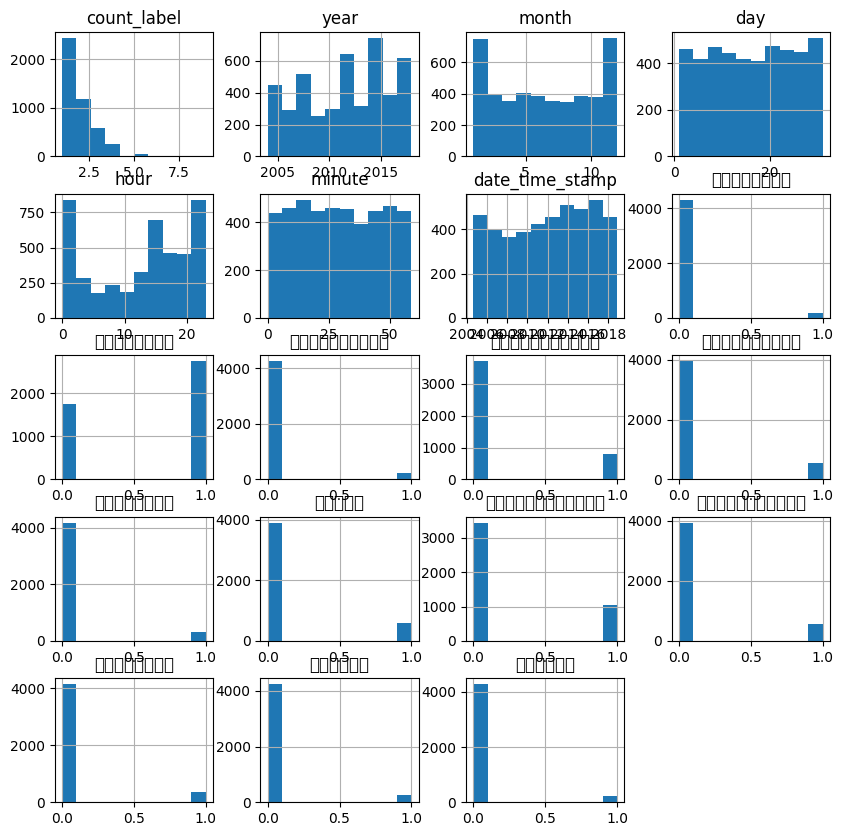

In [12]:
df.hist(figsize = (10,10))

<Axes: >

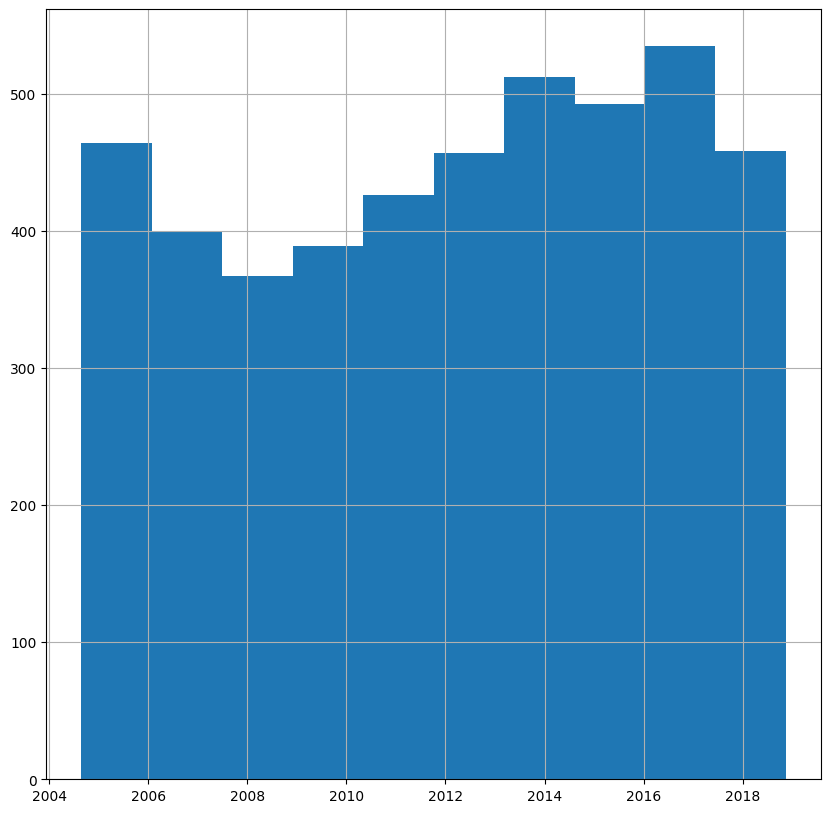

In [13]:
df["date_time_stamp"].hist(figsize = (10,10))

In [14]:
# # compare class column with every column.
# plt.figure(figsize=(40,20))

# for i, column in enumerate(df.columns):
#   plt.subplot(7,5,i+1)
#   sns.histplot(x = df[column],y= df['date_time_stamp'])
#   plt.title(i+1)
# plt.show

<Axes: >

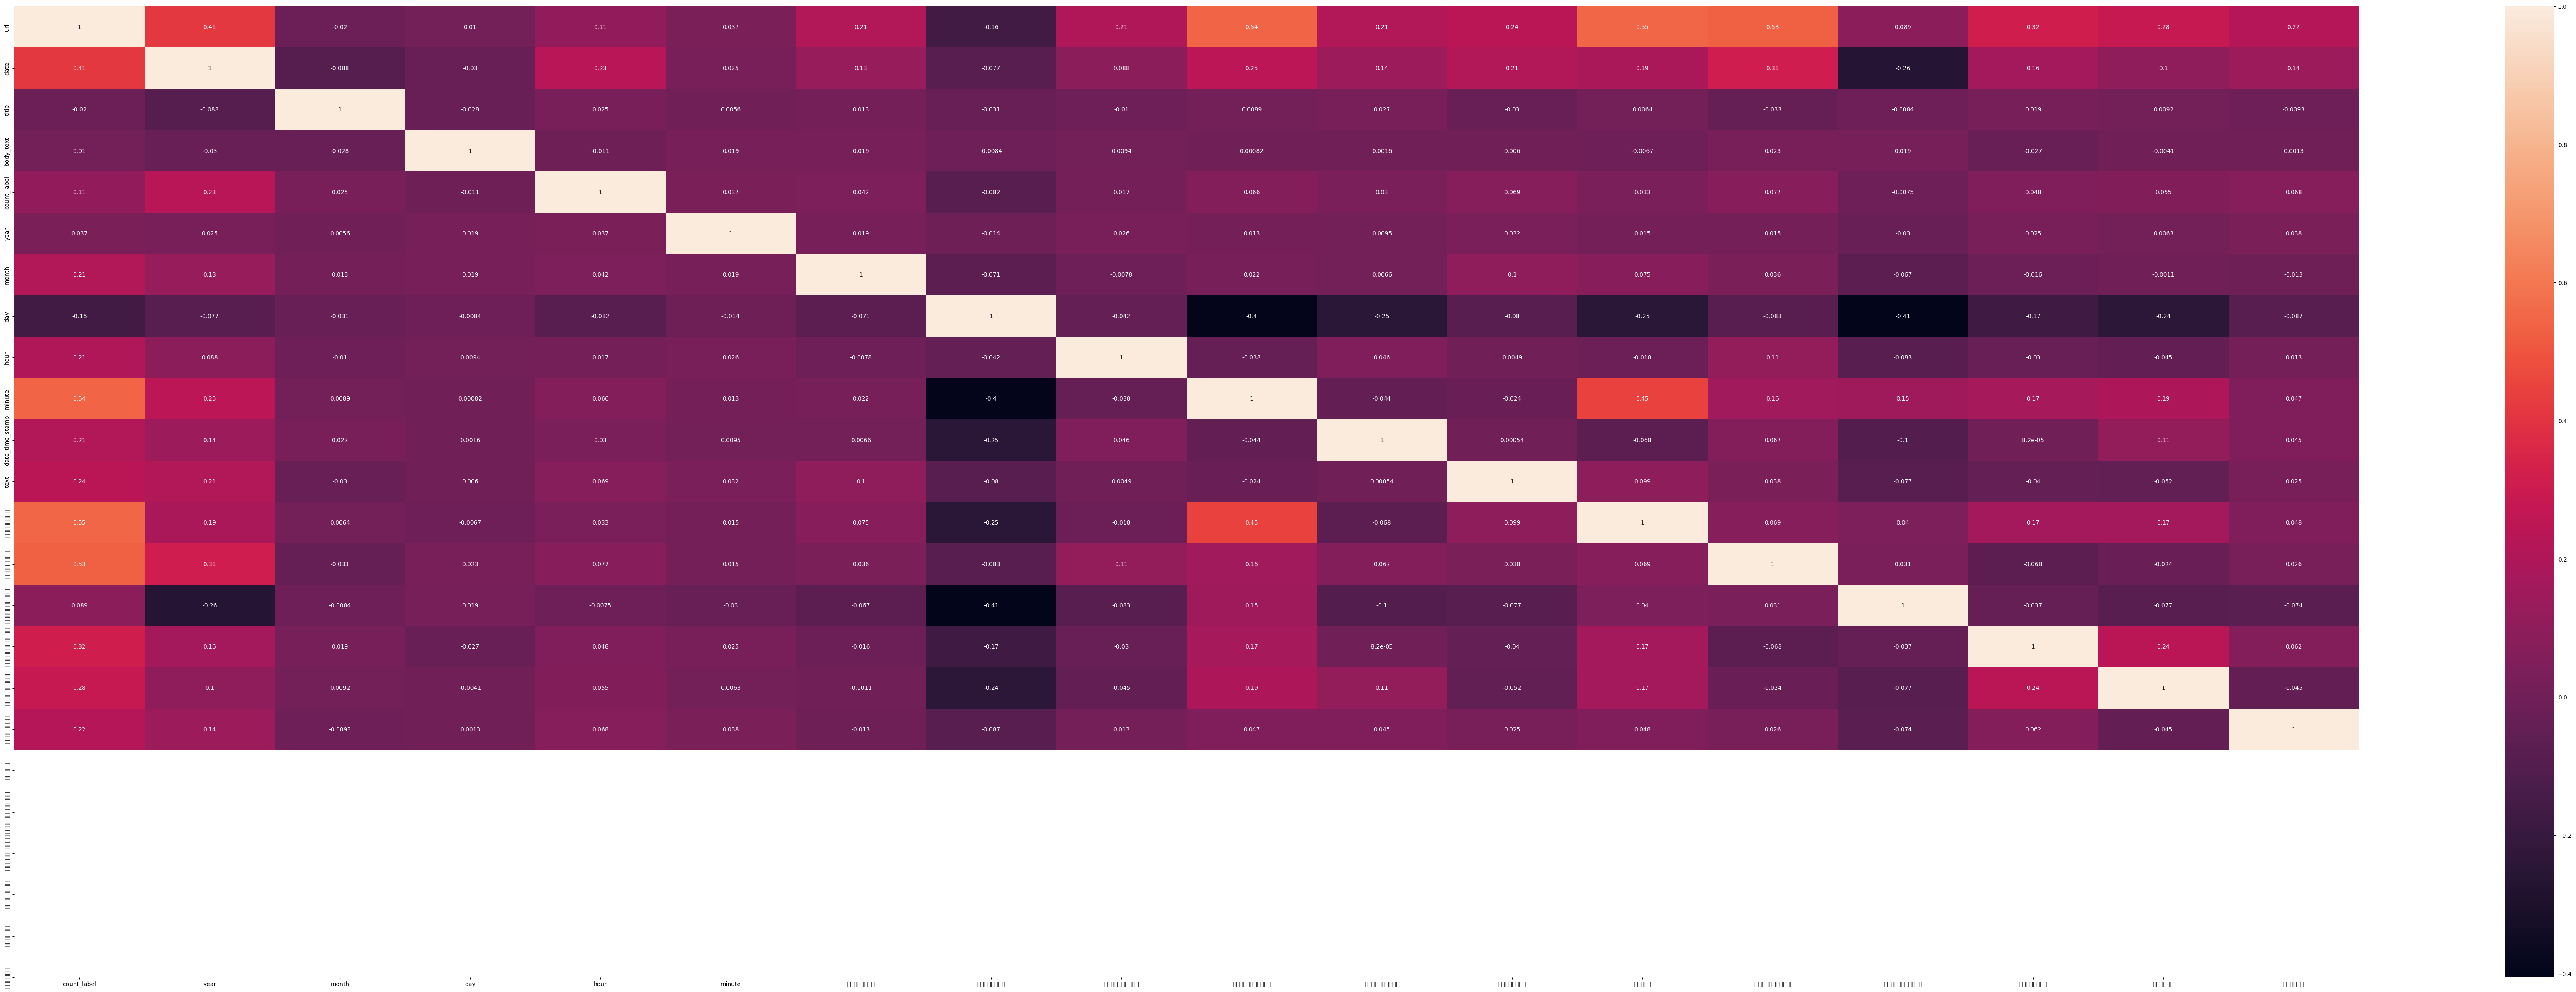

In [15]:
# we see the correlation of all columns. According to the color scale is between [-1,1].
plt.figure(figsize = (90,30))
data_corr = df.corr()
sns.heatmap(data_corr,xticklabels=data_corr.columns,yticklabels=df.columns,annot=True)

In [16]:
# show correlation not relate
corr_columns = data_corr.columns.tolist()
for i in range(len(corr_columns)):
  correlation_columns = data_corr[f'{data_corr.columns[i]}']

  for j in range(len(corr_columns)):
    correleation_row = correlation_columns[j]
    if (correleation_row < 1 and correleation_row > 0.8) or (correleation_row > -1 and correleation_row < -0.8):
    # if (correleation_row < 0.1 and correleation_row > -0.1):
      print(corr_columns[i],corr_columns[j],correleation_row)

In [17]:
# # describe count, mean, standard deviation, min, quarter1, quarter2, quarter3, max value
# df.describe()

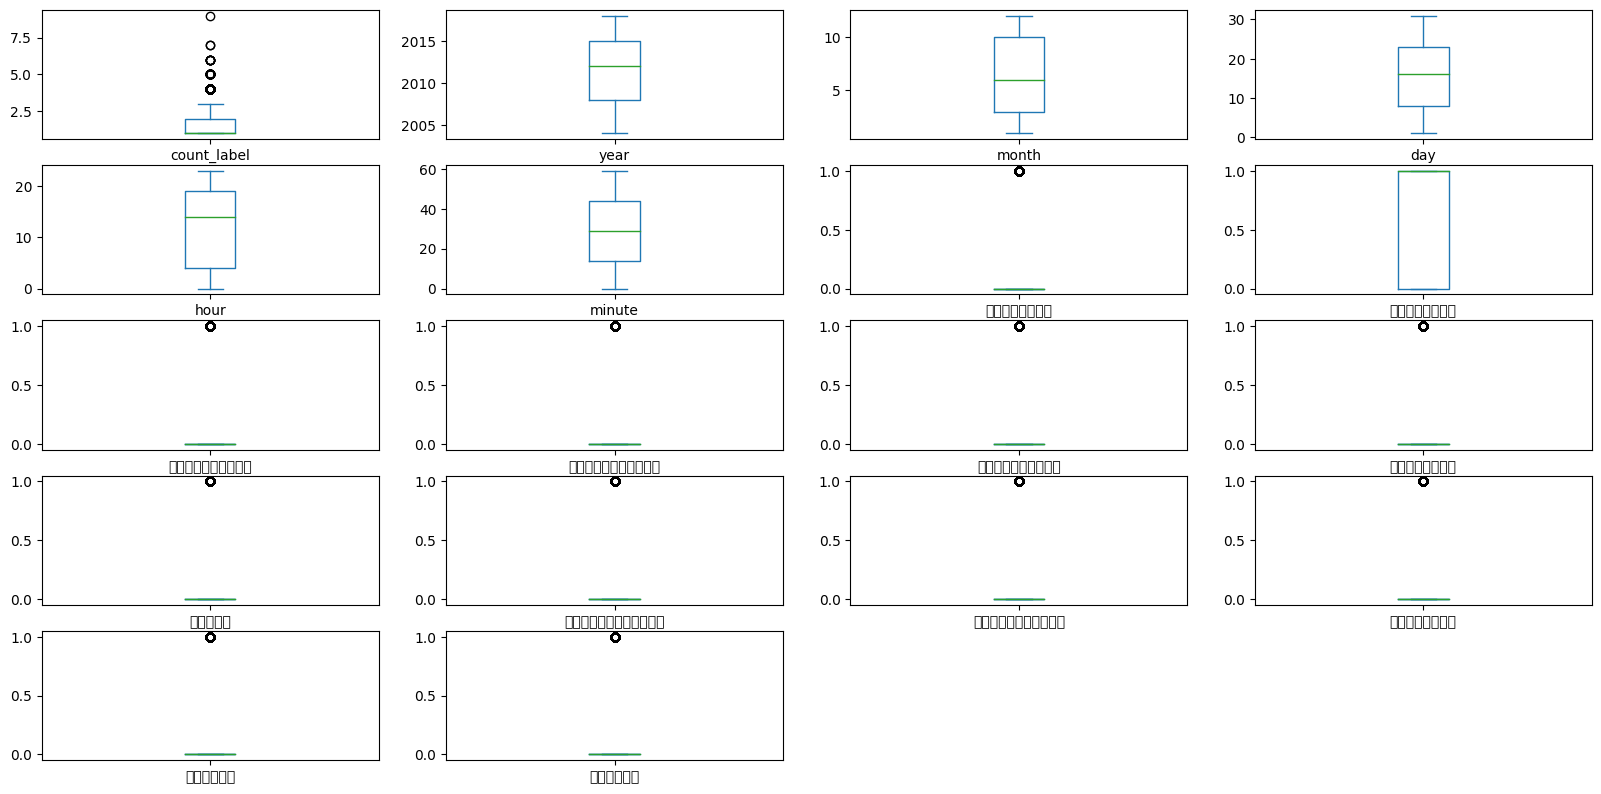

In [18]:
# plot function same describe function but it is visualization image. We see an outlier where lowest than Quarter1-1.5(Quarter3-Quarter1) or higher than Quarter3+1.5(Quarter3-Quarter1) is the outlier that we need to delete.
df.plot(kind='box', subplots=True, figsize=(20, 40),layout=(20,4))
plt.show()

# Feature Engineering

In [19]:
df.columns

Index(['url', 'date', 'title', 'body_text', 'count_label', 'year', 'month',
       'day', 'hour', 'minute', 'date_time_stamp', 'text', 'การศึกษา',
       'การเมือง', 'ความมั่นคง', 'คุณภาพชีวิต', 'ต่างประเทศ', 'วัฒนธรรม',
       'สังคม', 'สิทธิมนุษยชน', 'สิ่งแวดล้อม', 'เศรษฐกิจ', 'แรงงาน', 'ไอซีที'],
      dtype='object')

In [20]:
# delete column
del df['url']
del df['date']
del df['title']
del df['body_text']
del df['count_label']
del df['year']
del df['month']
del df['day']
del df['hour']
del df['minute']
del df['date_time_stamp']
df.columns

Index(['text', 'การศึกษา', 'การเมือง', 'ความมั่นคง', 'คุณภาพชีวิต',
       'ต่างประเทศ', 'วัฒนธรรม', 'สังคม', 'สิทธิมนุษยชน', 'สิ่งแวดล้อม',
       'เศรษฐกิจ', 'แรงงาน', 'ไอซีที'],
      dtype='object')

In [21]:
df

,text,การศึกษา,การเมือง,ความมั่นคง,คุณภาพชีวิต,ต่างประเทศ,วัฒนธรรม,สังคม,สิทธิมนุษยชน,สิ่งแวดล้อม,เศรษฐกิจ,แรงงาน,ไอซีที
0,อรรถจักร์ สัตยานุรักษ์: จินตนาการกับภาษา การใช...,1,1,0,0,0,1,0,0,0,0,0,0
1,กสทช.เร่งทรูฯ แจ้งสิทธิผู้ใช้บริการหลังยกเลิก ...,0,0,0,1,0,0,0,0,0,0,0,1
2,ศาลฎีกาให้ประกัน 'เฉลียว' ช่างตัดเสื้อคดี 112 ...,0,1,0,0,0,0,0,1,0,0,0,0
3,มูลนิธิเพื่อผู้บริโภคชวนประกวดสปอตโทรทัศน์ชิงเ...,0,0,0,1,0,0,0,0,0,0,0,0
4,กสทช.ร้อง 'ปลัดคลัง' พิจารณาการกระทำของรองปลัด...,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,‘UnionBook’ เครือข่ายสังคมออนไลน์ สำหรับ “สหภา...,0,0,0,1,0,0,1,0,0,0,1,0
4496,คณะรัฐมนตรีเห็นชอบร่าง พ.ร.บ.หอพัก-แยกหอพักชาย...,1,0,1,1,0,0,0,0,0,1,0,0
4497,"""นปช."" ออกแถลงการณ์ห่วงใย ""พันธมิตร"" แนวร่วมปร...",0,1,0,0,0,0,0,0,0,0,0,0
4498,ศาลปกครองรับฟ้อง 'ยิ่งลักษณ์' ฟ้อง 'ประยุทธ์' ...,0,1,0,0,0,0,0,0,0,0,0,0


## Stopwords

In [23]:
list_df_text = df['text'].tolist()
stopwords = list(thai_stopwords())
list_clean_stop_word = []

list_word_not_stopwords = []
for i in range(len(list_df_text)):
  list_word = word_tokenize(list_df_text[i])
  list_word_not_stopwords = [i for i in list_word if i not in stopwords]
  combine_word = ''.join(list_word_not_stopwords)
  list_clean_stop_word.append(combine_word)

df['text'] = list_clean_stop_word
df

,text,การศึกษา,การเมือง,ความมั่นคง,คุณภาพชีวิต,ต่างประเทศ,วัฒนธรรม,สังคม,สิทธิมนุษยชน,สิ่งแวดล้อม,เศรษฐกิจ,แรงงาน,ไอซีที
0,อรรถจักร์ สัตยานุรักษ์: จินตนาการภาษา ภาษา สื...,1,1,0,0,0,1,0,0,0,0,0,0
1,กสทช.เร่งทรู แจ้งสิทธิผู้ใช้บริการยกเลิก HBO 6...,0,0,0,1,0,0,0,0,0,0,0,1
2,ศาลฎีกาประกัน 'เฉลียว' ช่างตัดเสื้อคดี 112 นอน...,0,1,0,0,0,0,0,1,0,0,0,0
3,มูลนิธิผู้บริโภคชวนประกวดสปอตโทรทัศน์ชิงเงินแส...,0,0,0,1,0,0,0,0,0,0,0,0
4,กสทช.ร้อง 'ปลัดคลัง' พิจารณาการกระทำรองปลัด ปร...,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,‘UnionBook’ เครือข่ายสังคมออนไลน์ สำหรับ “สหภา...,0,0,0,1,0,0,1,0,0,0,1,0
4496,คณะรัฐมนตรีเห็นชอบร่าง พ.ร.บ.หอพัก-แยกหอพักชาย...,1,0,1,1,0,0,0,0,0,1,0,0
4497,"""นปช."" แถลงการณ์ห่วงใย ""พันธมิตร"" แนวร่วมประชา...",0,1,0,0,0,0,0,0,0,0,0,0
4498,ศาลปกครองรับฟ้อง 'ลักษณ์' ฟ้อง 'ประยุทธ์' กรณี...,0,1,0,0,0,0,0,0,0,0,0,0


## Regular Expression

In [24]:
# Define emoji pattern
emoji = re.compile("["
                   u"\U0001F600-\U0001F64F"  #Emoticons
                   u"\U0001F300-\U0001F5FF"  #Symbols & pictographs
                   u"\U0001F680-\U0001F6FF"  #Transport & map symbols
                   u"\U0001F1E0-\U0001F1FF"  #Flags (iOS)
                   u"\U00002500-\U00002BEF"  #Chinese char
                   u"\U00002702-\U000027B0"
                   u"\U00002702-\U000027B0"
                   u"\U000024C2-\U0001F251"
                   u"\U0001f926-\U0001f937"
                   u"\U00010000-\U0010ffff"
                   u"\u2640-\u2642"
                   u"\u2600-\u2B55"
                   u"\u200d"
                   u"\u23cf"
                   u"\u23e9"
                   u"\u231a"
                   u"\ufe0f"  #Dingbats
                   u"\u3030"
                   "]+", flags = re.UNICODE) #Flag option as Unicode

In [25]:
# ref: https://medium.com/@witchapongdaroontham/%E0%B8%82%E0%B8%B1%E0%B9%89%E0%B8%99%E0%B8%95%E0%B8%AD%E0%B8%99%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%80%E0%B8%95%E0%B8%A3%E0%B8%B5%E0%B8%A2%E0%B8%A1%E0%B8%82%E0%B9%89%E0%B8%AD%E0%B8%A1%E0%B8%B9%E0%B8%A5%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%80%E0%B8%A0%E0%B8%97-text-%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2-%E0%B9%81%E0%B8%9A%E0%B8%9A%E0%B8%87%E0%B9%88%E0%B8%B2%E0%B8%A2%E0%B9%86-%E0%B9%82%E0%B8%94%E0%B8%A2%E0%B9%83%E0%B8%8A%E0%B9%89-python-simple-thai-text-preprocessing-c8c46ca3ce46
list_clean_text = []
list_df_text = df['text'].tolist()
for i in range(len(list_df_text)):
  each_sentence = list_df_text[i]
  # print(each_sentence)
  clean_text = re.sub(r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', each_sentence)
  clean_text = re.sub(emoji, '', clean_text)
  clean_text = re.sub(r'@([a-zA-Z0-9_]+)', '', clean_text)
  clean_text = re.sub(r'#([a-zA-Z0-9ก-๙_]+)', '', clean_text)
  clean_text = clean_text.translate(str.maketrans('', '', string.punctuation))
  # print(clean_text)
  list_clean_text.append(clean_text)
df['text'] = list_clean_text
df


,text,การศึกษา,การเมือง,ความมั่นคง,คุณภาพชีวิต,ต่างประเทศ,วัฒนธรรม,สังคม,สิทธิมนุษยชน,สิ่งแวดล้อม,เศรษฐกิจ,แรงงาน,ไอซีที
0,อรรถจักร์ สัตยานุรักษ์ จินตนาการภาษา ภาษา สื่...,1,1,0,0,0,1,0,0,0,0,0,0
1,กสทชเร่งทรู แจ้งสิทธิผู้ใช้บริการยกเลิก HBO 6 ...,0,0,0,1,0,0,0,0,0,0,0,1
2,ศาลฎีกาประกัน เฉลียว ช่างตัดเสื้อคดี 112 นอนคุ...,0,1,0,0,0,0,0,1,0,0,0,0
3,มูลนิธิผู้บริโภคชวนประกวดสปอตโทรทัศน์ชิงเงินแส...,0,0,0,1,0,0,0,0,0,0,0,0
4,กสทชร้อง ปลัดคลัง พิจารณาการกระทำรองปลัด ประมู...,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,‘UnionBook’ เครือข่ายสังคมออนไลน์ สำหรับ “สหภา...,0,0,0,1,0,0,1,0,0,0,1,0
4496,คณะรัฐมนตรีเห็นชอบร่าง พรบหอพักแยกหอพักชายหญิง...,1,0,1,1,0,0,0,0,0,1,0,0
4497,นปช แถลงการณ์ห่วงใย พันธมิตร แนวร่วมประชาธิปไต...,0,1,0,0,0,0,0,0,0,0,0,0
4498,ศาลปกครองรับฟ้อง ลักษณ์ ฟ้อง ประยุทธ์ กรณีชดใช...,0,1,0,0,0,0,0,0,0,0,0,0


# train test split

In [26]:
# full rows
features = ['การศึกษา', 'การเมือง', 'ความมั่นคง', 'คุณภาพชีวิต', 'ต่างประเทศ', 'วัฒนธรรม', 'สังคม', 'สิทธิมนุษยชน', 'สิ่งแวดล้อม', 'เศรษฐกิจ', 'แรงงาน', 'ไอซีที']
X = df.loc[:, 'text'].to_numpy()
y = df.loc[:, features].to_numpy()
print(X.shape, y.shape)

(4500,) (4500, 12)


In [27]:

# train test split. train is 80 percent of dataset and test is 20 percent of dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3600,), (900,), (3600, 12), (900, 12))

In [28]:
# tfidf = TfidfVectorizer(tokenizer=word_tokenize, ngram_range=(1, 2), sublinear_tf=True)
# X_train = tfidf.fit_transform(X_train)
# X_test = tfidf.transform(X_test)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape


# Machine Learning

## Default Parameter

In [29]:
# from sklearn.pipeline import Pipeline

# # we use machine learning 9 models to predict data
# models = []
# # models.append(('GaussianNB', LabelPowerset(GaussianNB())))
# models.append(('logistic regression 1', OneVsRestClassifier(LogisticRegression(), n_jobs = 4)))
# # models.append(('logistic regression 2', LabelPowerset(LogisticRegression())))
# models.append(('RandomForestClassifier 1', OneVsRestClassifier(RandomForestClassifier(n_estimators= 100))))
# models.append(('RandomForestClassifier 2', OneVsRestClassifier(RandomForestClassifier(n_estimators= 400))))
# models.append(('ComplementNB', OneVsRestClassifier(ComplementNB())))
# models.append(('DecisionTreeClassifier_OneVsRestClassifier', OneVsRestClassifier(DecisionTreeClassifier())))
# models.append(('SVC', OneVsRestClassifier(SVC())))
# models.append(('XGBClassifier', OneVsRestClassifier(XGBClassifier())))
# models.append(('SGDClassifier', OneVsRestClassifier(SGDClassifier())))
# models.append(('MLPClassifier', OneVsRestClassifier(MLPClassifier())))
# models.append(('ExtraTreesClassifier', OneVsRestClassifier(ExtraTreesClassifier())))


# name_plot = []
# results = []
# all_name_model = []
# all_mean_score = []
# all_std_score = []
# list_temp_f1_score_micro = []
# list_temp_f1_score_macro = []

# list_temp_accuracy_score = []
# list_temp_hamming_loss = []

# for name, model in models:
#   print('name =',name, 'model =', model)
#   # we use pipeline to combine scalar and model
#   # pipe = Pipeline([("vectorizer", TfidfVectorizer(max_features = 25000)), ('clf', model)])
#   pipe = Pipeline([('clf', model)])
#   name_plot.append(f"{name}_{model}")
#   kfold = model_selection.KFold(n_splits=10)

#   cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "f1_micro")
#   pipe.fit(X_train, y_train)

#   y_pred_model =pipe.predict(X_test)
#   results.append(cv_results)
#   all_name_model.append(name)
#   # cross validation mean score
#   all_mean_score.append(cv_results.mean())
#   # cross validation std score
#   all_std_score.append(cv_results.std())
#   print(name)
#   # classification_report
#   print(classification_report(y_test, y_pred_model))
#   # accuracy score
#   print(f'f1_score_{name}:',f1_score(y_test, y_pred_model,average='micro'))
#   list_temp_f1_score_micro.append(f1_score(y_test, y_pred_model,average='micro'))
#   print(f'f1_score_{name}:',f1_score(y_test, y_pred_model,average='macro'))
#   list_temp_f1_score_macro.append(f1_score(y_test, y_pred_model,average='macro'))
#   print(f'accuracy_score_{name}:',accuracy_score(y_test, y_pred_model))
#   list_temp_accuracy_score.append(accuracy_score(y_test, y_pred_model))
#   print(f'Hamming loss_{name}:',hamming_loss(y_test, y_pred_model))
#   list_temp_hamming_loss.append(hamming_loss(y_test, y_pred_model))
#   # confusion_matrix
#   # plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
#   try:
#     cm = confusion_matrix(y_test.argmax(axis=1), y_pred_model.argmax(axis=1))
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
#     disp.plot()
#   except:
#     pass
#   plt.show()
# # boxplot algorithm comparison
# fig = plt.figure(figsize = (20,10))
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(name_plot, rotation=90)
# # plt.figure(figsize = (90,30))
# plt.show()
# # data frame comparison
# df_origin_predict = pd.DataFrame({
#     'name_model' : all_name_model,
#     'mean_score_model' : all_mean_score,
#     'std_score_model' : all_std_score,
#     'f1_score_micro':list_temp_f1_score_micro,
#     'f1_score_macro':list_temp_f1_score_macro,
#     'accuracy_score':list_temp_accuracy_score,
#     'hamming_loss':list_temp_hamming_loss,
# })
# # sort average score model column to easy to see. which model is the best.
# df_sort = df_origin_predict.sort_values(by=['mean_score_model'],ascending=False)
# display(df_sort)


## LogisticRegression

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.81      0.94      0.87       554
           2       0.00      0.00      0.00        43
           3       0.80      0.15      0.25       134
           4       0.90      0.07      0.14       122
           5       0.00      0.00      0.00        59
           6       0.00      0.00      0.00       116
           7       0.88      0.25      0.39       215
           8       0.95      0.18      0.30       102
           9       1.00      0.03      0.06        69
          10       1.00      0.07      0.12        46
          11       1.00      0.02      0.04        47

   micro avg       0.82      0.40      0.54      1553
   macro avg       0.61      0.14      0.18      1553
weighted avg       0.72      0.40      0.42      1553
 samples avg       0.64      0.52      0.55      1553



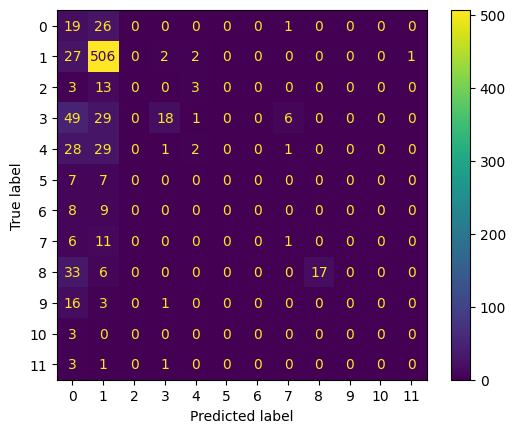

scores: .0.499379 +/- .0.017315
f1_score_micro: 0.5412883700821444 percent
f1_score_macro: 0.18019888499926148 percent
accuracy_score: 0.41333333333333333 percent
Hamming loss: 0.09824074074074074


In [ ]:
# models.append(('GaussianNB', LabelPowerset(GaussianNB())))
# models.append(('logistic regression 2', LabelPowerset(LogisticRegression())))
# pipe = Pipeline([("classifier", OneVsRestClassifier(LogisticRegression(), n_jobs = 4))])
# pipeline
clf = Pipeline([("vectorizer", TfidfVectorizer()), ("classifier", OneVsRestClassifier(LogisticRegression(), n_jobs = 4))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
kfold = model_selection.KFold(n_splits=10)
scores = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "f1_micro")

print(classification_report(y_test, y_pred))
try:
  cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
  disp.plot()
except:
  pass
plt.show()
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print('f1_score_micro:'  ,f1_score(y_test, y_pred,average='micro'), 'percent')
print('f1_score_macro:'  ,f1_score(y_test, y_pred,average='macro'), 'percent')

print('accuracy_score:',accuracy_score(y_test, y_pred), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

## RandomForestClassifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.75      0.94      0.84       554
           2       0.00      0.00      0.00        43
           3       0.75      0.09      0.16       134
           4       0.86      0.16      0.26       122
           5       1.00      0.02      0.03        59
           6       0.67      0.02      0.03       116
           7       0.85      0.19      0.31       215
           8       0.96      0.45      0.61       102
           9       1.00      0.01      0.03        69
          10       0.94      0.37      0.53        46
          11       0.67      0.09      0.15        47

   micro avg       0.78      0.43      0.55      1553
   macro avg       0.70      0.19      0.25      1553
weighted avg       0.76      0.43      0.44      1553
 samples avg       0.67      0.56      0.59      1553



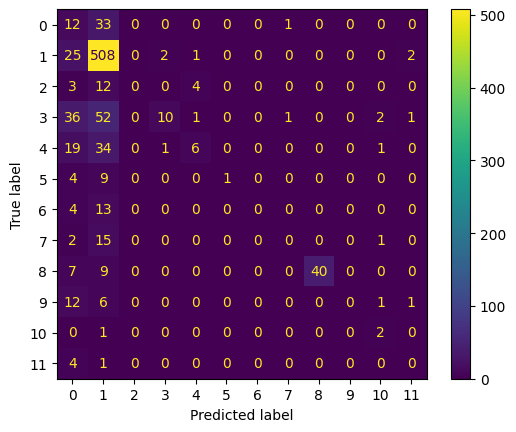

scores: .0.535998 +/- .0.018128
f1_score_micro: 0.5520963055209631 percent
f1_score_macro: 0.24699418335837312 percent
accuracy_score: 0.43222222222222223 percent
Hamming loss: 0.0999074074074074


In [ ]:
pipe = Pipeline([("vectorizer", TfidfVectorizer()),("classifier", OneVsRestClassifier(RandomForestClassifier(n_estimators= 100)))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
kfold = model_selection.KFold(n_splits=10)
scores = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "f1_micro")

print(classification_report(y_test, y_pred))
try:
  cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
  disp.plot()
except:
  pass
plt.show()
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print('f1_score_micro:'  ,f1_score(y_test, y_pred,average='micro'), 'percent')
print('f1_score_macro:'  ,f1_score(y_test, y_pred,average='macro'), 'percent')

print('accuracy_score:',accuracy_score(y_test, y_pred), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.77      0.98      0.86       554
           2       0.00      0.00      0.00        43
           3       0.88      0.10      0.19       134
           4       0.90      0.21      0.34       122
           5       1.00      0.02      0.03        59
           6       1.00      0.02      0.03       116
           7       0.93      0.18      0.30       215
           8       0.98      0.45      0.62       102
           9       1.00      0.03      0.06        69
          10       0.92      0.26      0.41        46
          11       0.62      0.11      0.18        47

   micro avg       0.79      0.44      0.57      1553
   macro avg       0.75      0.20      0.25      1553
weighted avg       0.82      0.44      0.45      1553
 samples avg       0.69      0.58      0.61      1553



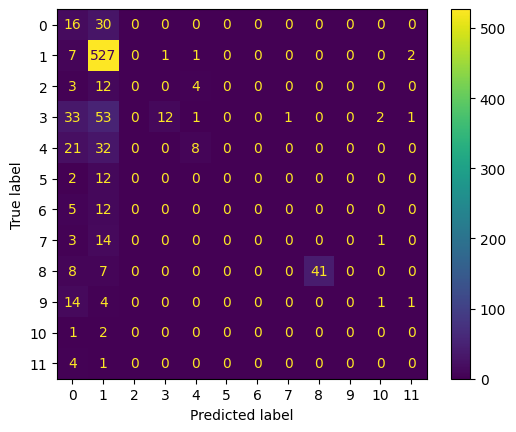

scores: .0.534701 +/- .0.018969
f1_score_micro: 0.5682382133995036 percent
f1_score_macro: 0.25135498834797765 percent
accuracy_score: 0.4488888888888889 percent
Hamming loss: 0.09666666666666666


In [ ]:
pipe = Pipeline([("vectorizer", TfidfVectorizer()),("classifier", OneVsRestClassifier(RandomForestClassifier(n_estimators= 400)))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
kfold = model_selection.KFold(n_splits=10)
scores = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "f1_micro")

print(classification_report(y_test, y_pred))
try:
  cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
  disp.plot()
except:
  pass
plt.show()
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print('f1_score_micro:'  ,f1_score(y_test, y_pred,average='micro'), 'percent')
print('f1_score_macro:'  ,f1_score(y_test, y_pred,average='macro'), 'percent')

print('accuracy_score:',accuracy_score(y_test, y_pred), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

## ComplementNB

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.62      1.00      0.77       554
           2       0.00      0.00      0.00        43
           3       0.00      0.00      0.00       134
           4       0.00      0.00      0.00       122
           5       0.00      0.00      0.00        59
           6       0.00      0.00      0.00       116
           7       0.00      0.00      0.00       215
           8       0.00      0.00      0.00       102
           9       0.00      0.00      0.00        69
          10       0.00      0.00      0.00        46
          11       0.00      0.00      0.00        47

   micro avg       0.62      0.36      0.45      1553
   macro avg       0.05      0.08      0.06      1553
weighted avg       0.22      0.36      0.27      1553
 samples avg       0.62      0.48      0.52      1553



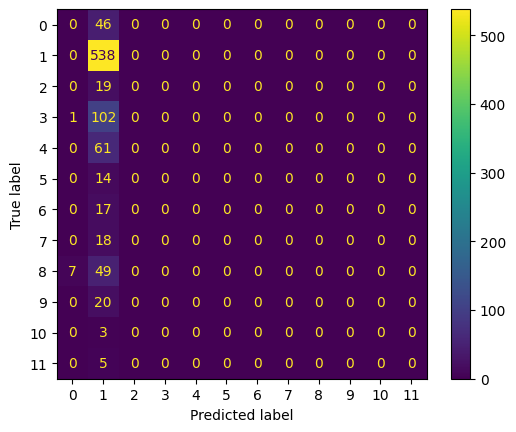

scores: .0.445343 +/- .0.014177
f1_score_micro: 0.4531697341513292 percent
f1_score_macro: 0.06385431074227754 percent
accuracy_score: 0.37555555555555553 percent
Hamming loss: 0.1237962962962963


In [ ]:
pipe = Pipeline([("vectorizer", TfidfVectorizer()),("classifier", OneVsRestClassifier(ComplementNB()))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
kfold = model_selection.KFold(n_splits=10)
scores = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "f1_micro")

print(classification_report(y_test, y_pred))
try:
  cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
  disp.plot()
except:
  pass
plt.show()
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print('f1_score_micro:'  ,f1_score(y_test, y_pred,average='micro'), 'percent')
print('f1_score_macro:'  ,f1_score(y_test, y_pred,average='macro'), 'percent')

print('accuracy_score:',accuracy_score(y_test, y_pred), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

## DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.42      0.39      0.40        46
           1       0.80      0.80      0.80       554
           2       0.22      0.26      0.23        43
           3       0.36      0.44      0.39       134
           4       0.52      0.52      0.52       122
           5       0.47      0.32      0.38        59
           6       0.27      0.27      0.27       116
           7       0.52      0.53      0.53       215
           8       0.79      0.75      0.77       102
           9       0.37      0.30      0.33        69
          10       0.66      0.72      0.69        46
          11       0.62      0.53      0.57        47

   micro avg       0.59      0.59      0.59      1553
   macro avg       0.50      0.49      0.49      1553
weighted avg       0.59      0.59      0.59      1553
 samples avg       0.61      0.67      0.60      1553



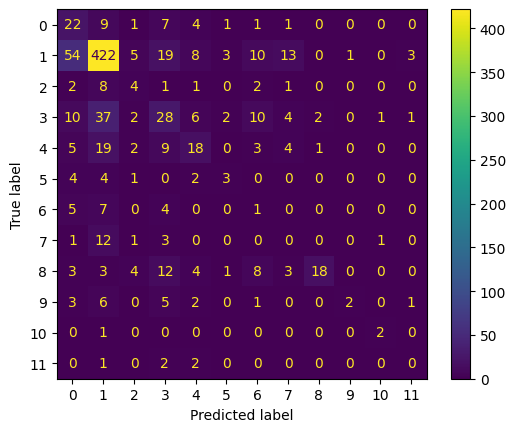

scores: .0.596411 +/- .0.016696
f1_score_micro: 0.5875160875160875 percent
f1_score_macro: 0.49072561763813277 percent
accuracy_score: 0.29555555555555557 percent
Hamming loss: 0.1187037037037037


In [ ]:
pipe = Pipeline([("vectorizer", TfidfVectorizer()),("classifier", OneVsRestClassifier(DecisionTreeClassifier()))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
kfold = model_selection.KFold(n_splits=10)
scores = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "f1_micro")

print(classification_report(y_test, y_pred))
try:
  cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
  disp.plot()
except:
  pass
plt.show()
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print('f1_score_micro:'  ,f1_score(y_test, y_pred,average='micro'), 'percent')
print('f1_score_macro:'  ,f1_score(y_test, y_pred,average='macro'), 'percent')

print('accuracy_score:',accuracy_score(y_test, y_pred), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

## SVC

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.83      0.93      0.88       554
           2       0.00      0.00      0.00        43
           3       0.83      0.15      0.25       134
           4       0.91      0.16      0.28       122
           5       0.00      0.00      0.00        59
           6       0.00      0.00      0.00       116
           7       0.86      0.26      0.39       215
           8       0.98      0.43      0.60       102
           9       1.00      0.01      0.03        69
          10       1.00      0.26      0.41        46
          11       0.83      0.11      0.19        47

   micro avg       0.85      0.43      0.57      1553
   macro avg       0.60      0.19      0.25      1553
weighted avg       0.72      0.43      0.47      1553
 samples avg       0.68      0.56      0.59      1553



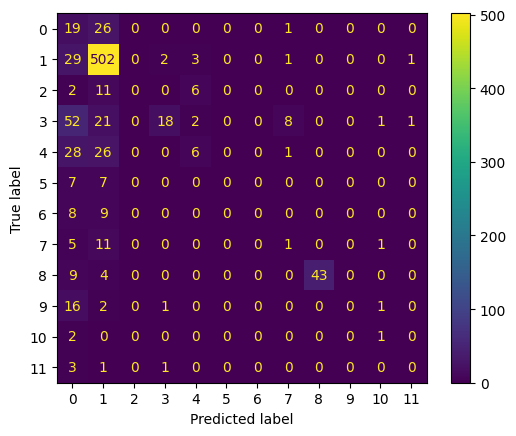

scores: .0.520173 +/- .0.018977
f1_score_micro: 0.5734980826587133 percent
f1_score_macro: 0.2528280664493828 percent
accuracy_score: 0.44222222222222224 percent
Hamming loss: 0.09268518518518519


In [ ]:
pipe = Pipeline([("vectorizer", TfidfVectorizer()),("classifier", OneVsRestClassifier(SVC()))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
kfold = model_selection.KFold(n_splits=10)
scores = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "f1_micro")

print(classification_report(y_test, y_pred))
try:
  cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
  disp.plot()
except:
  pass
plt.show()
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print('f1_score_micro:'  ,f1_score(y_test, y_pred,average='micro'), 'percent')
print('f1_score_macro:'  ,f1_score(y_test, y_pred,average='macro'), 'percent')

print('accuracy_score:',accuracy_score(y_test, y_pred), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

## XGBClassifier

              precision    recall  f1-score   support

           0       0.57      0.09      0.15        46
           1       0.85      0.90      0.88       554
           2       0.50      0.12      0.19        43
           3       0.65      0.53      0.58       134
           4       0.93      0.53      0.68       122
           5       0.87      0.22      0.35        59
           6       0.62      0.16      0.25       116
           7       0.75      0.53      0.62       215
           8       0.85      0.73      0.78       102
           9       0.69      0.26      0.38        69
          10       0.95      0.76      0.84        46
          11       0.79      0.47      0.59        47

   micro avg       0.81      0.61      0.69      1553
   macro avg       0.75      0.44      0.52      1553
weighted avg       0.78      0.61      0.65      1553
 samples avg       0.78      0.70      0.72      1553



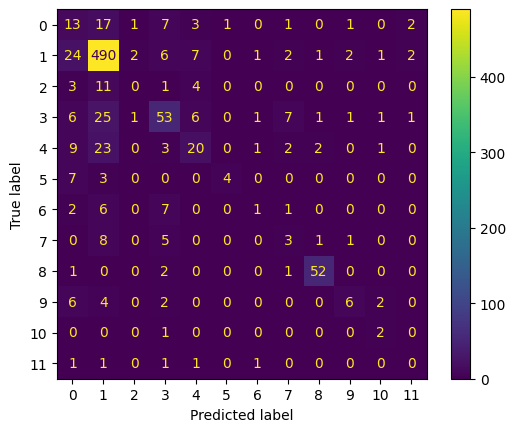

scores: .0.684708 +/- .0.012808
f1_score_micro: 0.6924493554327809 percent
f1_score_macro: 0.5239521690008473 percent
accuracy_score: 0.49333333333333335 percent
Hamming loss: 0.07731481481481481


In [ ]:
pipe = Pipeline([("vectorizer", TfidfVectorizer()),("classifier", OneVsRestClassifier(XGBClassifier()))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
kfold = model_selection.KFold(n_splits=10)
scores = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "f1_micro")

print(classification_report(y_test, y_pred))
try:
  cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
  disp.plot()
except:
  pass
plt.show()
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print('f1_score_micro:'  ,f1_score(y_test, y_pred,average='micro'), 'percent')
print('f1_score_macro:'  ,f1_score(y_test, y_pred,average='macro'), 'percent')

print('accuracy_score:',accuracy_score(y_test, y_pred), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

## SGDClassifier

              precision    recall  f1-score   support

           0       0.88      0.15      0.26        46
           1       0.88      0.90      0.89       554
           2       0.78      0.16      0.27        43
           3       0.67      0.53      0.59       134
           4       0.81      0.54      0.65       122
           5       0.85      0.29      0.43        59
           6       0.69      0.16      0.25       116
           7       0.75      0.53      0.62       215
           8       0.87      0.72      0.78       102
           9       0.91      0.29      0.44        69
          10       0.89      0.67      0.77        46
          11       0.79      0.40      0.54        47

   micro avg       0.83      0.61      0.70      1553
   macro avg       0.81      0.45      0.54      1553
weighted avg       0.82      0.61      0.67      1553
 samples avg       0.79      0.71      0.72      1553



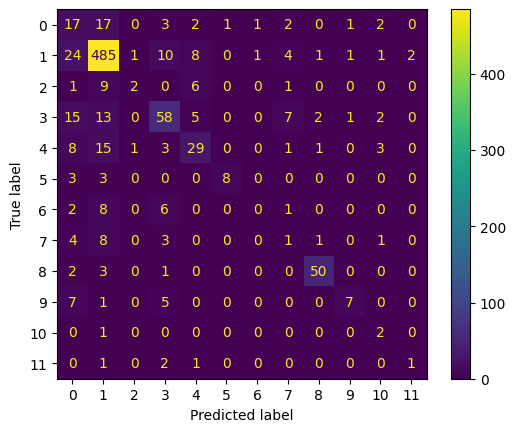

scores: .0.667318 +/- .0.014872
f1_score_micro: 0.7003717472118958 percent
f1_score_macro: 0.5409469982495919 percent
accuracy_score: 0.48777777777777775 percent
Hamming loss: 0.07462962962962963


In [ ]:
pipe = Pipeline([("vectorizer", TfidfVectorizer()),("classifier", OneVsRestClassifier(SGDClassifier()))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
kfold = model_selection.KFold(n_splits=10)
scores = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "f1_micro")

print(classification_report(y_test, y_pred))
try:
  cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
  disp.plot()
except:
  pass
plt.show()
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print('f1_score_micro:'  ,f1_score(y_test, y_pred,average='micro'), 'percent')
print('f1_score_macro:'  ,f1_score(y_test, y_pred,average='macro'), 'percent')

print('accuracy_score:',accuracy_score(y_test, y_pred), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

## MLPClassifier

              precision    recall  f1-score   support

           0       0.88      0.15      0.26        46
           1       0.82      0.82      0.82       554
           2       0.89      0.19      0.31        43
           3       0.60      0.49      0.54       134
           4       0.75      0.53      0.62       122
           5       0.92      0.20      0.33        59
           6       0.53      0.16      0.24       116
           7       0.70      0.49      0.58       215
           8       0.68      0.40      0.51       102
           9       0.82      0.41      0.54        69
          10       0.89      0.54      0.68        46
          11       0.79      0.40      0.54        47

   micro avg       0.76      0.55      0.64      1553
   macro avg       0.77      0.40      0.50      1553
weighted avg       0.76      0.55      0.61      1553
 samples avg       0.70      0.62      0.63      1553



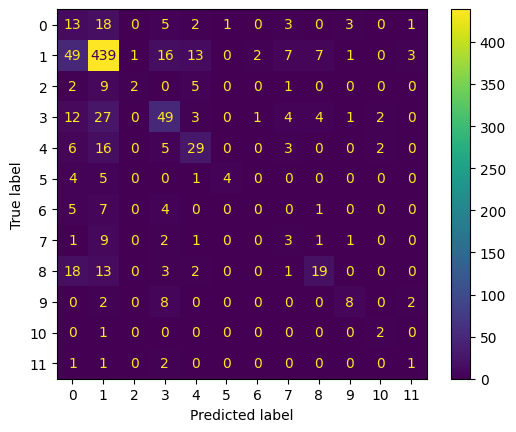

scores: .0.617154 +/- .0.014403
f1_score_micro: 0.6368757040931281 percent
f1_score_macro: 0.49679944645065516 percent
accuracy_score: 0.40555555555555556 percent
Hamming loss: 0.08953703703703704


In [ ]:
pipe = Pipeline([("vectorizer", TfidfVectorizer(max_features = 25000)),("classifier", OneVsRestClassifier(MLPClassifier()))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
kfold = model_selection.KFold(n_splits=10)
scores = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "f1_micro")

print(classification_report(y_test, y_pred))
try:
  cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
  disp.plot()
except:
  pass
plt.show()
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print('f1_score_micro:'  ,f1_score(y_test, y_pred,average='micro'), 'percent')
print('f1_score_macro:'  ,f1_score(y_test, y_pred,average='macro'), 'percent')

print('accuracy_score:',accuracy_score(y_test, y_pred), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

## ExtraTreesClassifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.75      0.92      0.83       554
           2       0.00      0.00      0.00        43
           3       0.73      0.16      0.27       134
           4       0.86      0.25      0.38       122
           5       1.00      0.03      0.07        59
           6       0.88      0.06      0.11       116
           7       0.81      0.22      0.34       215
           8       0.95      0.34      0.50       102
           9       1.00      0.04      0.08        69
          10       0.94      0.37      0.53        46
          11       0.78      0.15      0.25        47

   micro avg       0.77      0.44      0.56      1553
   macro avg       0.72      0.21      0.28      1553
weighted avg       0.77      0.44      0.47      1553
 samples avg       0.66      0.55      0.57      1553



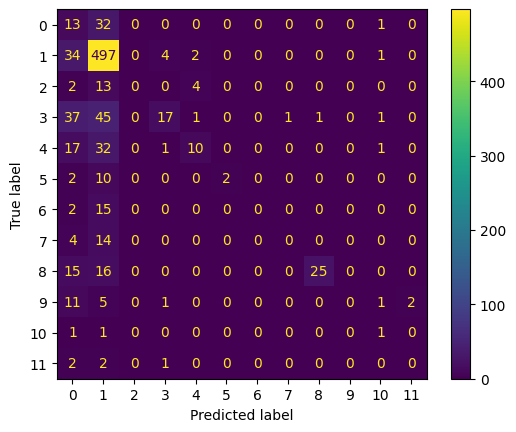

scores: .0.538539 +/- .0.017545
f1_score_micro: 0.5593429158110883 percent
f1_score_macro: 0.2806915771418675 percent
accuracy_score: 0.4011111111111111 percent
Hamming loss: 0.09935185185185186


In [ ]:
pipe = Pipeline([("vectorizer", TfidfVectorizer(max_features = 25000)),("classifier", OneVsRestClassifier(ExtraTreesClassifier()))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
kfold = model_selection.KFold(n_splits=10)
scores = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "f1_micro")

print(classification_report(y_test, y_pred))
try:
  cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
  disp.plot()
except:
  pass
plt.show()
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print('f1_score_micro:'  ,f1_score(y_test, y_pred,average='micro'), 'percent')
print('f1_score_macro:'  ,f1_score(y_test, y_pred,average='macro'), 'percent')

print('accuracy_score:',accuracy_score(y_test, y_pred), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

# Best Model

SGD is the best

              precision    recall  f1-score   support

           0       0.88      0.15      0.26        46
           1       0.82      0.83      0.83       554
           2       0.64      0.21      0.32        43
           3       0.56      0.43      0.49       134
           4       0.78      0.51      0.62       122
           5       0.77      0.17      0.28        59
           6       0.57      0.15      0.23       116
           7       0.73      0.52      0.60       215
           8       0.72      0.47      0.57       102
           9       0.82      0.33      0.47        69
          10       0.96      0.59      0.73        46
          11       0.79      0.49      0.61        47

   micro avg       0.77      0.55      0.64      1553
   macro avg       0.75      0.40      0.50      1553
weighted avg       0.76      0.55      0.61      1553
 samples avg       0.70      0.63      0.64      1553



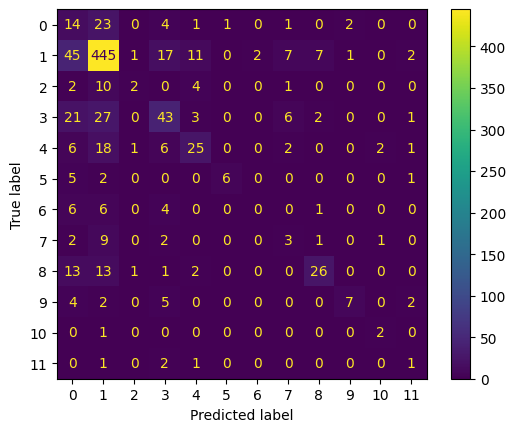

scores: .0.629463 +/- .0.015904
f1_score_micro: 0.6416228399699474 percent
f1_score_macro: 0.49964578940483295 percent
accuracy_score: 0.41444444444444445 percent
Hamming loss: 0.08833333333333333


In [30]:
pipe = Pipeline([("vectorizer", TfidfVectorizer()),("classifier", OneVsRestClassifier(SGDClassifier()))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
kfold = model_selection.KFold(n_splits=10)
scores = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "f1_micro")

print(classification_report(y_test, y_pred))
try:
  cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
  disp.plot()
except:
  pass
plt.show()
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print('f1_score_micro:'  ,f1_score(y_test, y_pred,average='micro'), 'percent')
print('f1_score_macro:'  ,f1_score(y_test, y_pred,average='macro'), 'percent')

print('accuracy_score:',accuracy_score(y_test, y_pred), 'percent')
print("Hamming loss:",hamming_loss(y_test,y_pred))

# Predict

In [31]:
test_result = pd.read_csv("/content/drive/MyDrive/nlp/Multi-label classification/exam03_result.csv")
test_result

,url,date,title,body_text,labels_2
0,https://prachatai.com/print/50591,2013-12-22 06:18,การทิ้งเหตุผลของชนชั้นกลาง : อนารยะข่มขืน,คำปรารภ\nผู้เขียนไม่ปฏิเสธว่าชนชั้นล่างบางส่วน...,['การเมือง']
1,https://prachatai.com/print/37665,2011-10-30 00:00,‘ศูนย์ทนายมุสลิม’ ตั้งกรรมการ เคลียร์ข้อหาเรีย...,ศูนย์ทนายความมุสลิม ตั้งคณะกรรมการตรวจสอบข้อเท...,"['สิทธิมนุษยชน', 'ความมั่นคง']"
2,https://prachatai.com/print/9994,2006-10-07 01:41,"มอบรางวัล ""คมตุลา"" แก่ ""เจริญ วัดอักษร"" นักต่อ...",7 ต.ค. 2549 เมื่อวันที่ 6 ตุลาคม ในงานกิจกรรมร...,['การเมือง']
3,https://prachatai.com/print/26092,2009-10-05 04:15,แก้ รธน. แยก 6 ร่าง ทำประชามติหลังสภารับหลักการ,4 ตุลาคม 52 เว็บไซต์มติชน รายงานว่า เวลาประมาณ...,NaN
4,https://prachatai.com/print/51331,2014-01-22 18:59,4 องค์กรวิชาชีพสื่อ จี้หยุด พ.ร.ก.ฉุกเฉิน ชี้ล...,22 ม.ค.2557 สมาคมนักข่าวนักหนังสือพิมพ์แห่งประ...,NaN
...,...,...,...,...,...
495,https://prachatai.com/print/51519,2014-01-30 23:50,นปช.ประกาศเลิกชุมนุมใหญ่ 31 ม.ค.นี้ หวั่นเจอสร...,30 ม.ค.2557 เมื่อเวลา 13.00 น.ที่ห้างอิมพีเรีย...,NaN
496,https://prachatai.com/print/42984,2012-10-04 17:18,กะเหรี่ยง KNU ปลดผู้บัญชาการสูงสุด หลังไปพบทาง...,นายพลมูตู เซ พอ ผู้บัญชาการกองทัพกะเหรี่ยง KLN...,NaN
497,https://prachatai.com/print/71568,2017-05-21 01:40,ผู้นำชนพื้นเมืองในเวเนซุเอลาทำพิธีสาปแช่งรัฐบา...,"การต่อต้านทางการเมืองต่อผู้นำเวเนซุเอลา ""นิโคล...",NaN
498,https://prachatai.com/print/60176,2015-07-05 11:39,เปิดคำให้การขบวนการประชาธิปไตยใหม่ 'ข้าพเจ้ากร...,ศูนย์ทนายความเพื่อสิทธิมนุษยชนเปิดเผยคำให้การข...,NaN


In [32]:
# 'text', 'การศึกษา', 'การเมือง', 'ความมั่นคง', 'คุณภาพชีวิต',
#        'ต่างประเทศ', 'วัฒนธรรม', 'สังคม', 'สิทธิมนุษยชน', 'สิ่งแวดล้อม',
#        'เศรษฐกิจ', 'แรงงาน', 'ไอซีที'
features = ['การศึกษา', 'การเมือง', 'ความมั่นคง', 'คุณภาพชีวิต', 'ต่างประเทศ', 'วัฒนธรรม', 'สังคม', 'สิทธิมนุษยชน', 'สิ่งแวดล้อม', 'เศรษฐกิจ', 'แรงงาน', 'ไอซีที']

def invert_multi_hot(encoded_labels):
    """Reverse a single multi-hot encoded label to a tuple of vocab terms."""
    hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
    return np.take(features, hot_indices)

def decoder(link_dataset):
  df = pd.read_csv(link_dataset)
  df['text'] = df['title'] + ' ' + df['body_text']
  del df['title']
  del df['body_text']
  del df['url']
  del df['date']
  # clean text
  list_df_text = df['text'].tolist()
  stopwords = list(thai_stopwords())
  list_clean_stop_word = []

  list_word_not_stopwords = []
  for i in range(len(list_df_text)):
    list_word = word_tokenize(list_df_text[i])
    list_word_not_stopwords = [i for i in list_word if i not in stopwords]
    combine_word = ''.join(list_word_not_stopwords)
    list_clean_stop_word.append(combine_word)

  df['text_clean'] = list_clean_stop_word

  # Define emoji pattern
  emoji = re.compile("["
                    u"\U0001F600-\U0001F64F"  #Emoticons
                    u"\U0001F300-\U0001F5FF"  #Symbols & pictographs
                    u"\U0001F680-\U0001F6FF"  #Transport & map symbols
                    u"\U0001F1E0-\U0001F1FF"  #Flags (iOS)
                    u"\U00002500-\U00002BEF"  #Chinese char
                    u"\U00002702-\U000027B0"
                    u"\U00002702-\U000027B0"
                    u"\U000024C2-\U0001F251"
                    u"\U0001f926-\U0001f937"
                    u"\U00010000-\U0010ffff"
                    u"\u2640-\u2642"
                    u"\u2600-\u2B55"
                    u"\u200d"
                    u"\u23cf"
                    u"\u23e9"
                    u"\u231a"
                    u"\ufe0f"  #Dingbats
                    u"\u3030"
                    "]+", flags = re.UNICODE) #Flag option as Unicode

  # ref: https://medium.com/@witchapongdaroontham/%E0%B8%82%E0%B8%B1%E0%B9%89%E0%B8%99%E0%B8%95%E0%B8%AD%E0%B8%99%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%80%E0%B8%95%E0%B8%A3%E0%B8%B5%E0%B8%A2%E0%B8%A1%E0%B8%82%E0%B9%89%E0%B8%AD%E0%B8%A1%E0%B8%B9%E0%B8%A5%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%80%E0%B8%A0%E0%B8%97-text-%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2-%E0%B9%81%E0%B8%9A%E0%B8%9A%E0%B8%87%E0%B9%88%E0%B8%B2%E0%B8%A2%E0%B9%86-%E0%B9%82%E0%B8%94%E0%B8%A2%E0%B9%83%E0%B8%8A%E0%B9%89-python-simple-thai-text-preprocessing-c8c46ca3ce46
  list_clean_text = []
  list_df_text = df['text_clean'].tolist()
  for i in range(len(list_df_text)):
    each_sentence = list_df_text[i]
    # print(each_sentence)
    clean_text = re.sub(r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', each_sentence)
    clean_text = re.sub(emoji, '', clean_text)
    clean_text = re.sub(r'@([a-zA-Z0-9_]+)', '', clean_text)
    clean_text = re.sub(r'#([a-zA-Z0-9ก-๙_]+)', '', clean_text)
    clean_text = clean_text.translate(str.maketrans('', '', string.punctuation))
    # print(clean_text)
    list_clean_text.append(clean_text)
  df['text_clean'] = list_clean_text
  # predict
  X_decode = df.loc[:, 'text_clean'].to_numpy()
  # tfidf
  # tfidf = TfidfVectorizer(tokenizer=word_tokenize, ngram_range=(1, 2), sublinear_tf=True)
  # X_decode = tfidf.fit_transform(X_decode)
  # predict decode
  label_predict = pipe.predict(X_decode)
  list_label = []
  for i in range(len(label_predict)):
    if type(df['labels_2'][i]) == type(str('text')):
      list_label.append(ast.literal_eval(df['labels_2'][i]))
    else:
      list_label.append(invert_multi_hot(label_predict[i]))
  df['labels_2'] = list_label
  del df['text_clean']
  return df
test = decoder("/content/drive/MyDrive/nlp/Multi-label classification/exam03_result.csv")
test

,labels_2,text
0,[การเมือง],การทิ้งเหตุผลของชนชั้นกลาง : อนารยะข่มขืน คำปร...
1,"[สิทธิมนุษยชน, ความมั่นคง]",‘ศูนย์ทนายมุสลิม’ ตั้งกรรมการ เคลียร์ข้อหาเรีย...
2,[การเมือง],"มอบรางวัล ""คมตุลา"" แก่ ""เจริญ วัดอักษร"" นักต่อ..."
3,[การเมือง],แก้ รธน. แยก 6 ร่าง ทำประชามติหลังสภารับหลักกา...
4,[การเมือง],4 องค์กรวิชาชีพสื่อ จี้หยุด พ.ร.ก.ฉุกเฉิน ชี้ล...
...,...,...
495,[การเมือง],นปช.ประกาศเลิกชุมนุมใหญ่ 31 ม.ค.นี้ หวั่นเจอสร...
496,[ต่างประเทศ],กะเหรี่ยง KNU ปลดผู้บัญชาการสูงสุด หลังไปพบทาง...
497,"[การเมือง, ต่างประเทศ]",ผู้นำชนพื้นเมืองในเวเนซุเอลาทำพิธีสาปแช่งรัฐบา...
498,"[การเมือง, สิทธิมนุษยชน]",เปิดคำให้การขบวนการประชาธิปไตยใหม่ 'ข้าพเจ้ากร...
